In [1]:
import os 
import pandas as pd

In [2]:
# Path to the root folder by going up two levels from the current directory
root_folder = os.path.join('..', 'Datasets')

# Path to file.csv within the datasets folder under the root folder
csv_file_path = os.path.join(root_folder, 'quarter.csv')

quarter = pd.read_csv(csv_file_path)
quarter.head()

,date,level-current,level-chained,change-current,change-chained
0,1947-04-01,246.3,1932.3,6.4,-0.4
1,1947-07-01,250.1,1930.3,17.3,6.4
2,1947-10-01,260.3,1960.7,9.3,6.0
3,1948-01-01,266.2,1989.5,10.5,6.7
4,1948-04-01,272.9,2021.9,10.0,2.3


<Axes: >

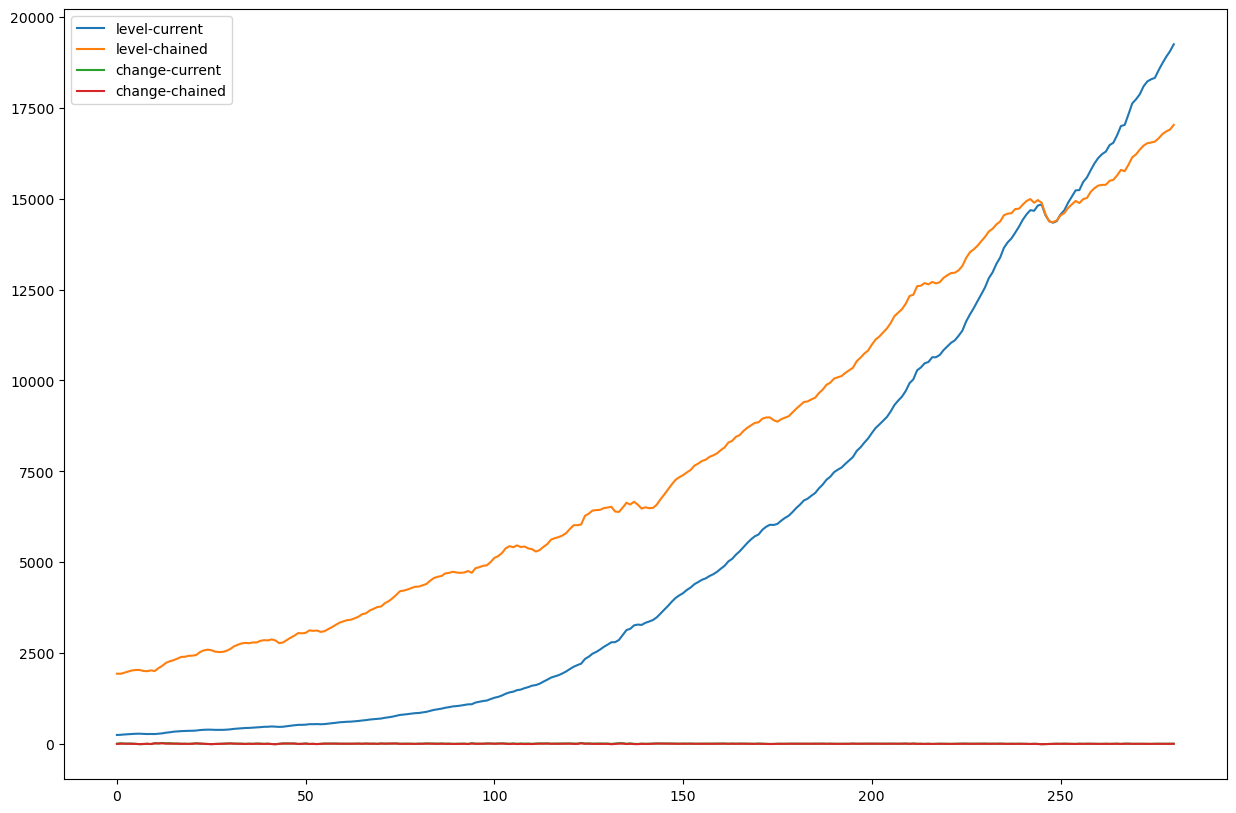

In [3]:
quarter.plot(figsize=(15, 10))
#  Plot outputs line plots by default
#  All numerical columns will be plotted aginest the index 

In [4]:
# Notice the dates are not formatted correctly
# Caste the dates from string to datetime 
quarter['date'] = pd.to_datetime(quarter.date)
quarter = quarter.set_index('date')
# similar to: quarter.set_index('date', inplace=True)

<Axes: xlabel='date'>

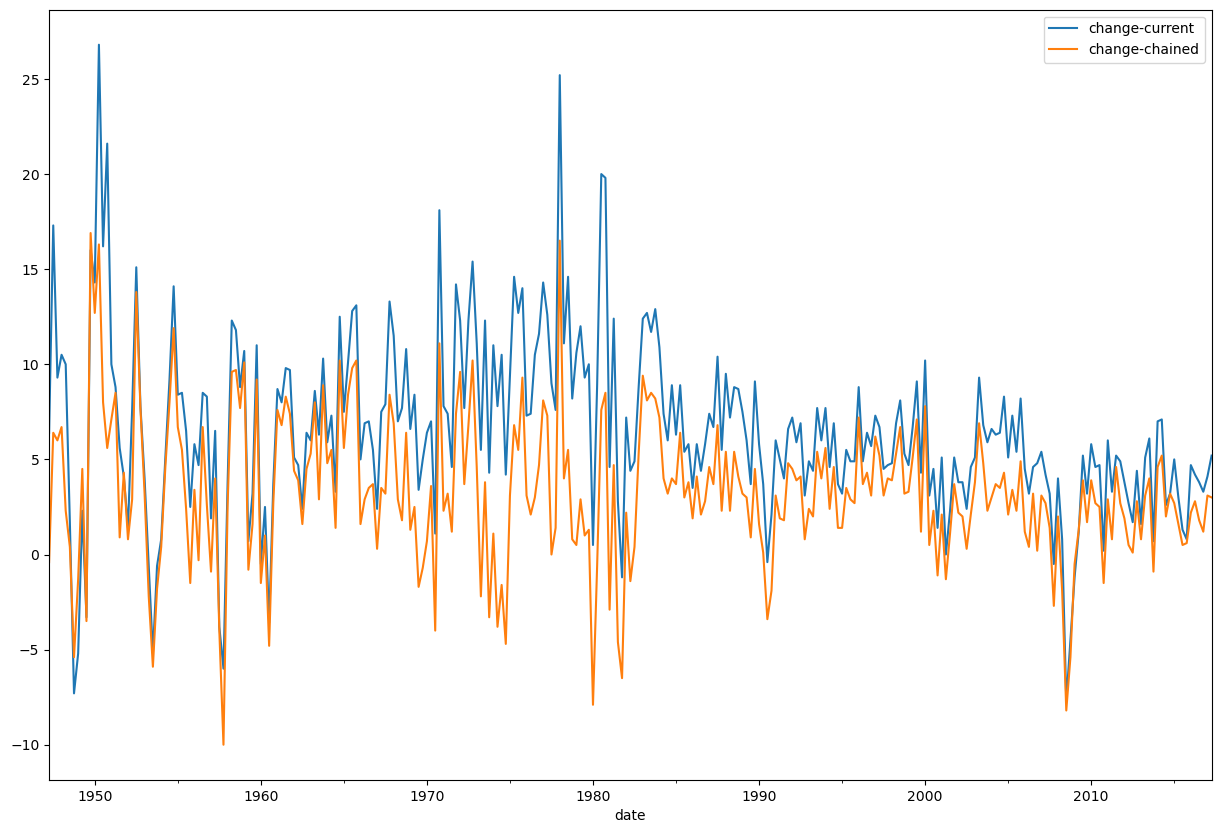

In [5]:
# If we only want to plot two columns, we can alwyas filter on them then plot 
quarter[['change-current','change-chained']].plot(figsize=(15, 10))

<Axes: xlabel='date'>

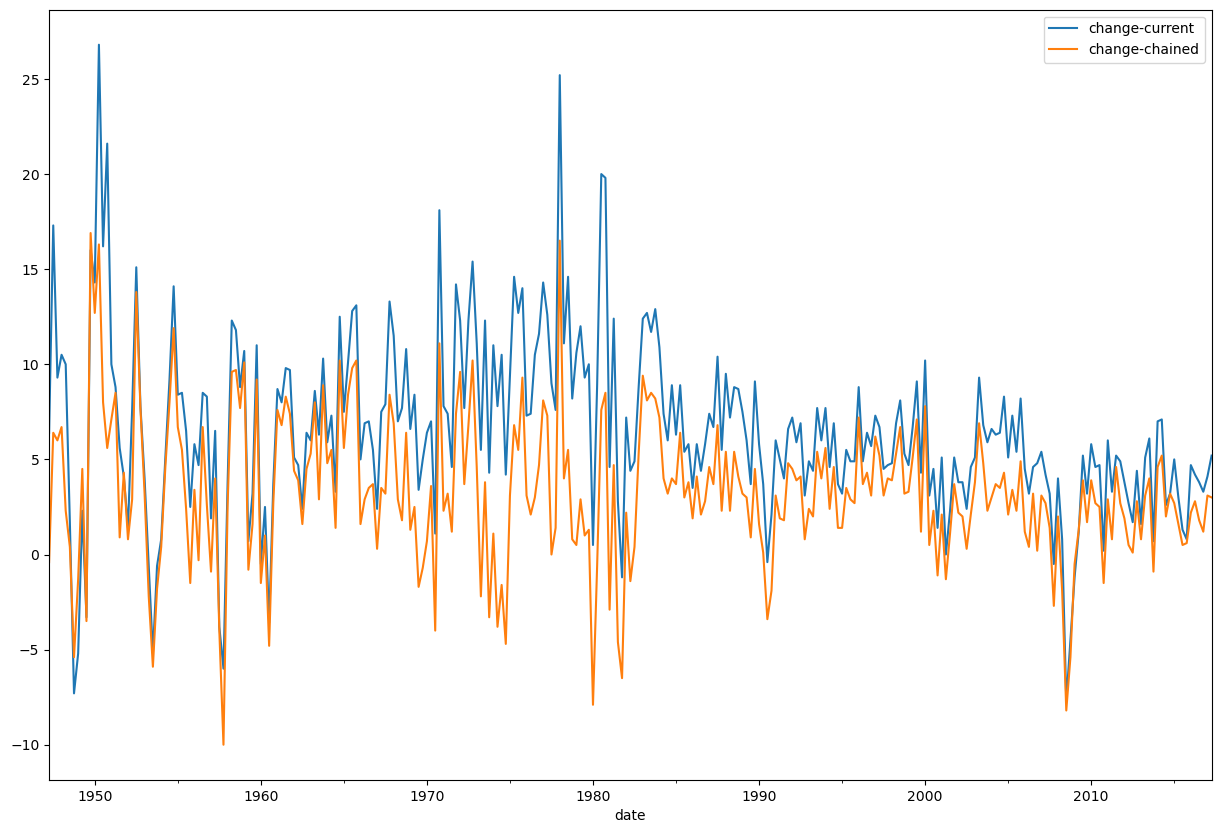

In [6]:
# Another way to filter on fields is to pass y parameter to plot method and the list of fields 
quarter.plot(y=['change-current','change-chained'], figsize=(15, 10))

<Axes: xlabel='date'>

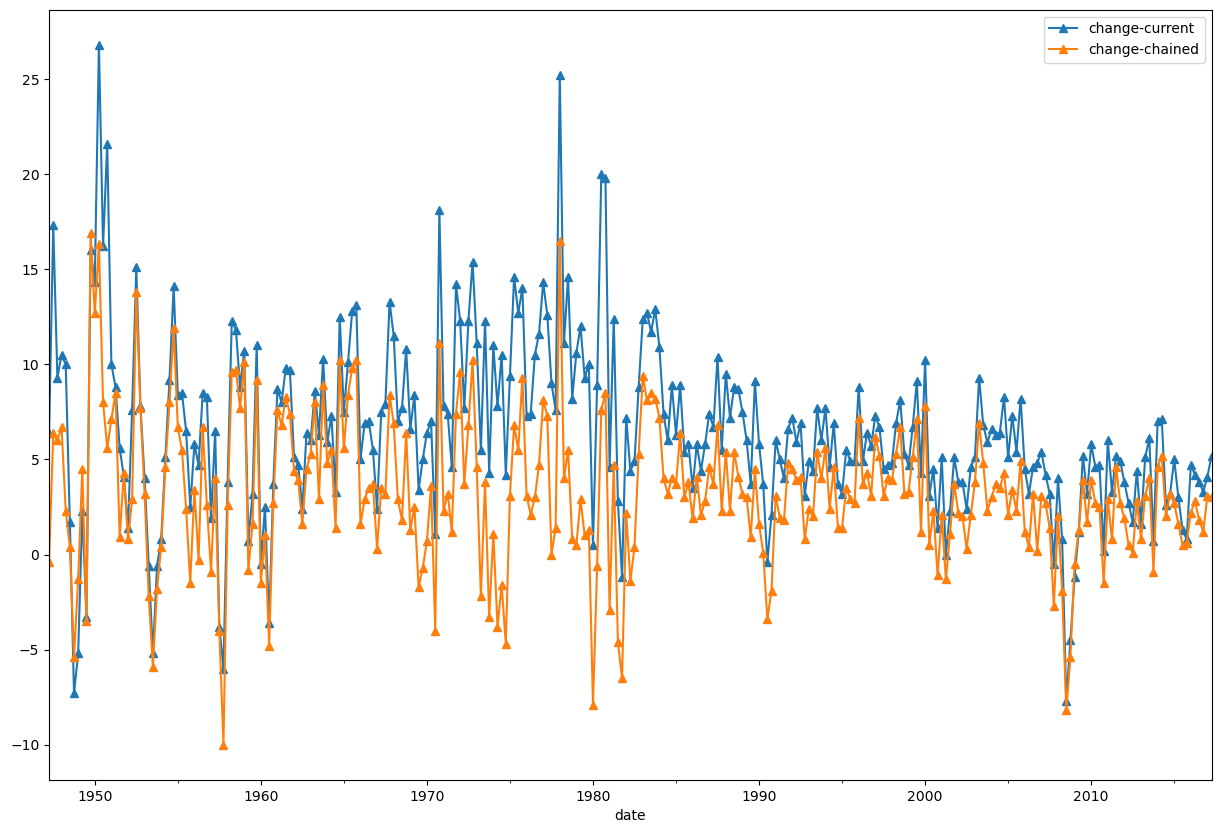

In [7]:
# lets create a scater plot by passing x, y and kind to the plot method 
quarter.plot(y=['change-current','change-chained'], marker='^', figsize=(15, 10))

<Axes: xlabel='change-current', ylabel='change-chained'>

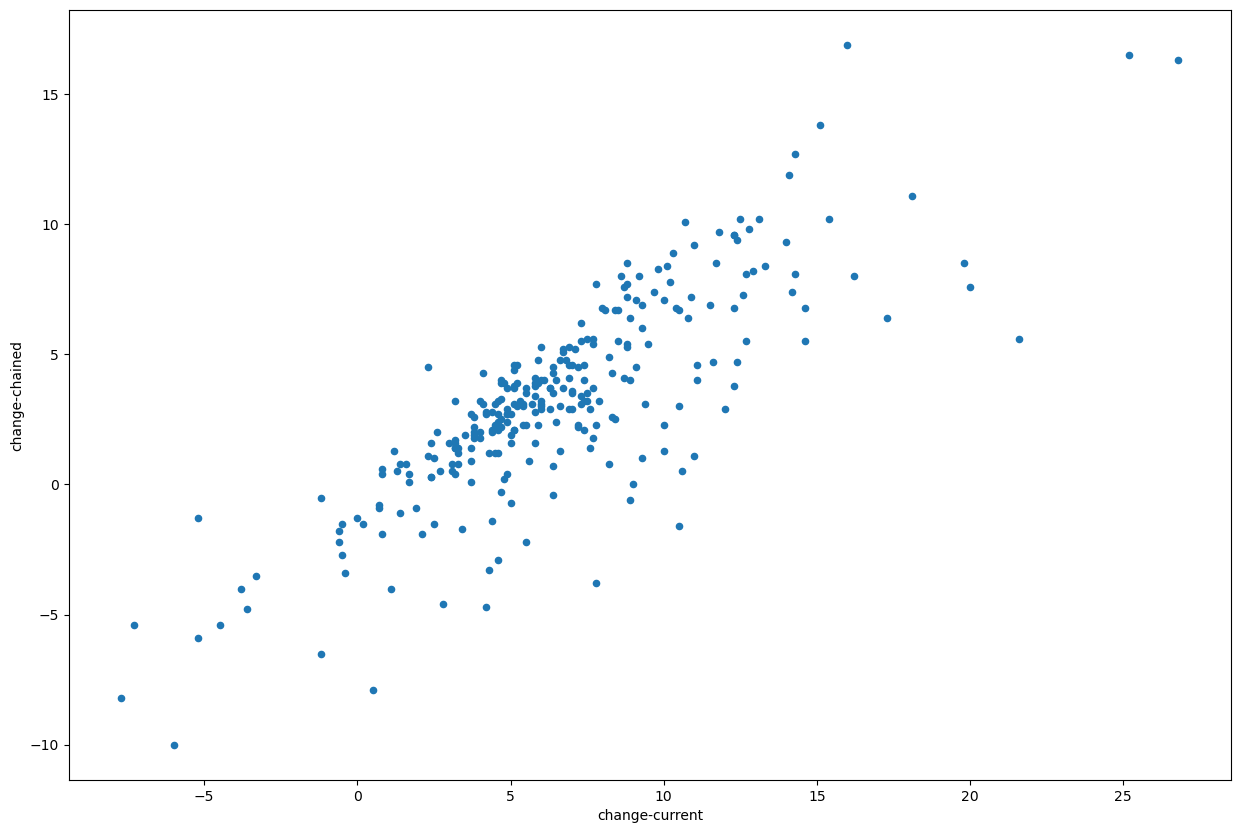

In [8]:
quarter.plot(x='change-current', y='change-chained', kind='scatter', figsize=(15, 10))

In [9]:
# Let's break our data set down into quarters and plot 1st/2nd/3rd/4th quarter GDP over time 

# first we need to reset the index as a column 
quarter = quarter.reset_index()
quarter['doy'] = quarter.date.apply(lambda x: x.dayofyear)

array([[<Axes: title={'center': 'doy'}>]], dtype=object)

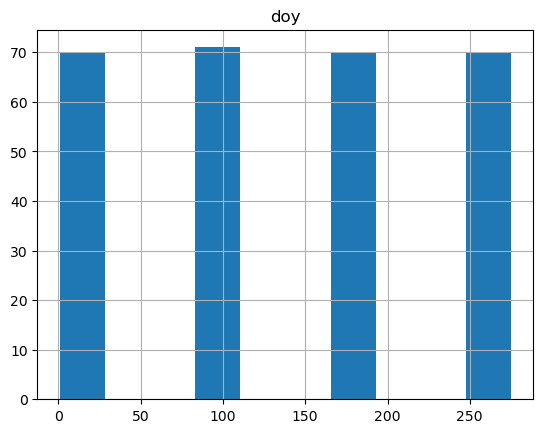

In [10]:
# quarter.plot(kind='hist', y='doy')
# or we can use the hist method instead
quarter.hist('doy')

In [11]:
# if we dont have a quarter, we can utilize the day of the year function and cut function to enerate the corrosponding label 
# use pd.cut to break up our doy into four categories based on cutoffs 
quarter['quarter'] = pd.cut(quarter.doy, bins= [-1, 50, 120, 220, 400], labels = [1, 2, 3, 4])

In [12]:
# use `by` keyword for some extra magic 
quarter = quarter.set_index('date')

/var/folders/9w/p3vhwm0x1s1fy0rzmlp_h4qw0000gn/T/ipykernel_5970/2017505099.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quarter.hist('change-current', by='quarter')


array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>]],
      dtype=object)

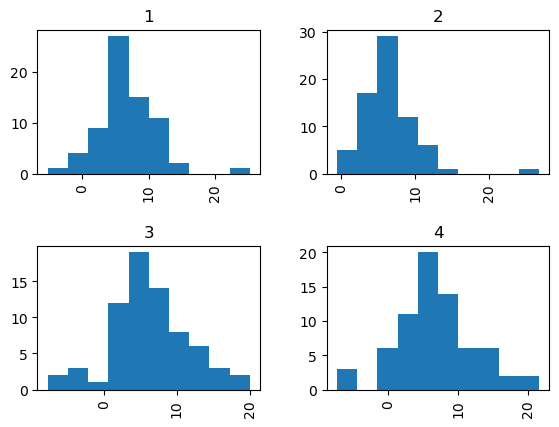

In [13]:
quarter.hist('change-current', by='quarter')